<a href="https://colab.research.google.com/github/InduwaraGayashan001/OpenCV/blob/main/Pose_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/089r2yg6aao858l/opencv_bootcamp_assets_NB14.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB14.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

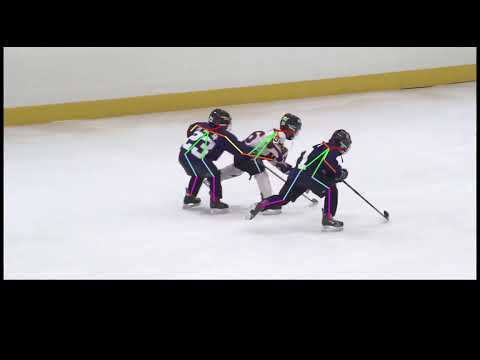

In [3]:
video = YouTubeVideo("RyCsSc_2ZEI", width=1024, height=640)
display(video)

# Loading Caffe model

In [4]:
protoFile   = "pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = os.path.join("model", "pose_iter_160000.caffemodel")

In [5]:
nPoints = 15
POSE_PAIRS = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [1, 5],
    [5, 6],
    [6, 7],
    [1, 14],
    [14, 8],
    [8, 9],
    [9, 10],
    [14, 11],
    [11, 12],
    [12, 13],
]

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

# Read Image

In [8]:
im = cv2.imread("Tiger_Woods_crop.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

inWidth  = im.shape[1]
inHeight = im.shape[0]

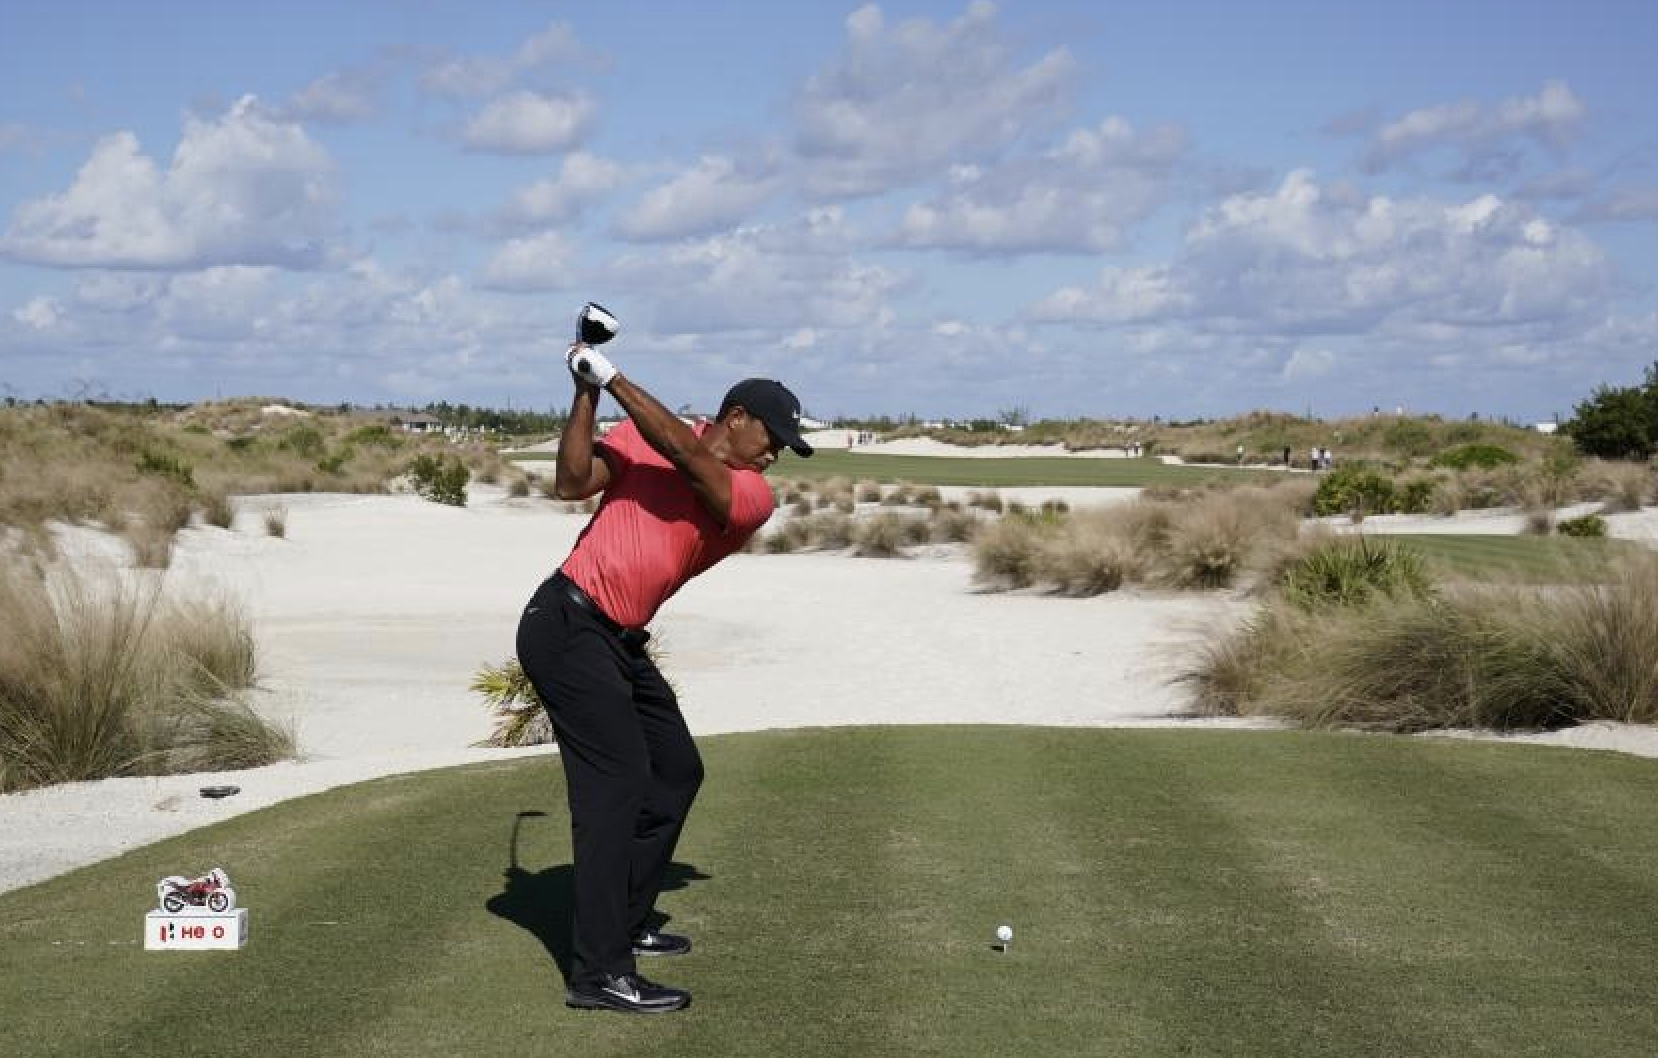

In [9]:
Image(filename="Tiger_Woods.png")


# Convert image to blob

In [10]:
netInputSize =(368, 368)
inpBlob = cv2.dnn.blobFromImage(im, 1.0 / 255, netInputSize, (0, 0, 0), swapRB=True, crop=False)
net.setInput(inpBlob)


# Run Inference

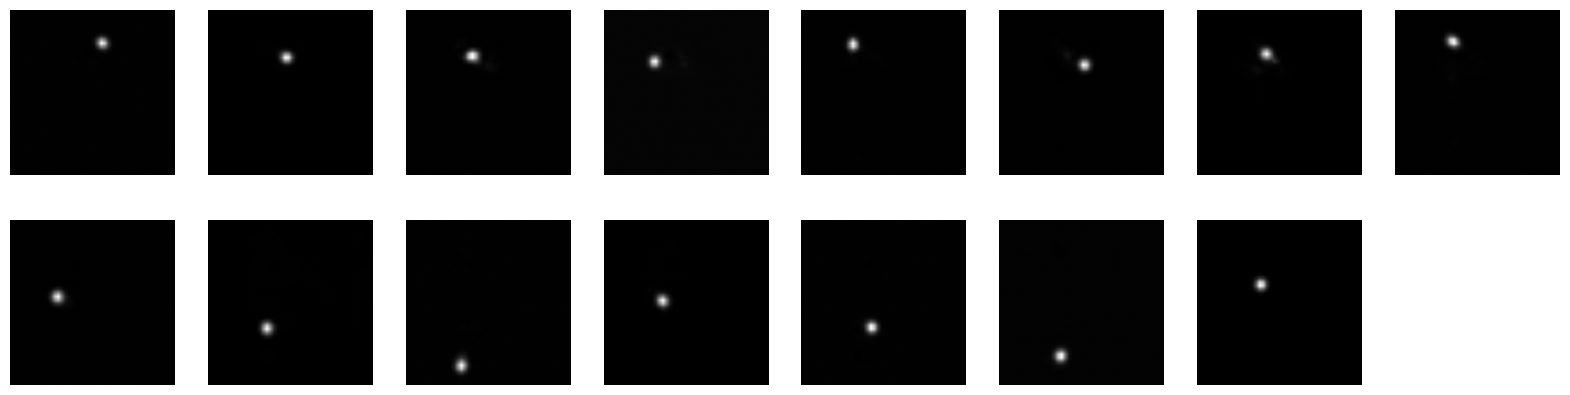

In [11]:
output = net.forward()

plt.figure(figsize=(20, 5))
for i in range(nPoints):
    probMap = output[0, i, :, :]
    displayMap = cv2.resize(probMap, (inWidth, inHeight), cv2.INTER_LINEAR)

    plt.subplot(2, 8, i + 1)
    plt.imshow(displayMap, cmap="gray")
    plt.axis("off")

# Extract Points

In [12]:
scaleX = inWidth / output.shape[3]
scaleY = inHeight / output.shape[2]

points =[]
threshold = 0.1

for i in range(nPoints):
    probMap = output[0, i, :, :]
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    x = (scaleX * point[0])
    y = (scaleY * point[1])

    if prob > threshold:
        points.append((int(x), int(y)))
    else:
        points.append(None)


# Display Points and Skelton

(np.float64(-0.5), np.float64(841.5), np.float64(843.5), np.float64(-0.5))

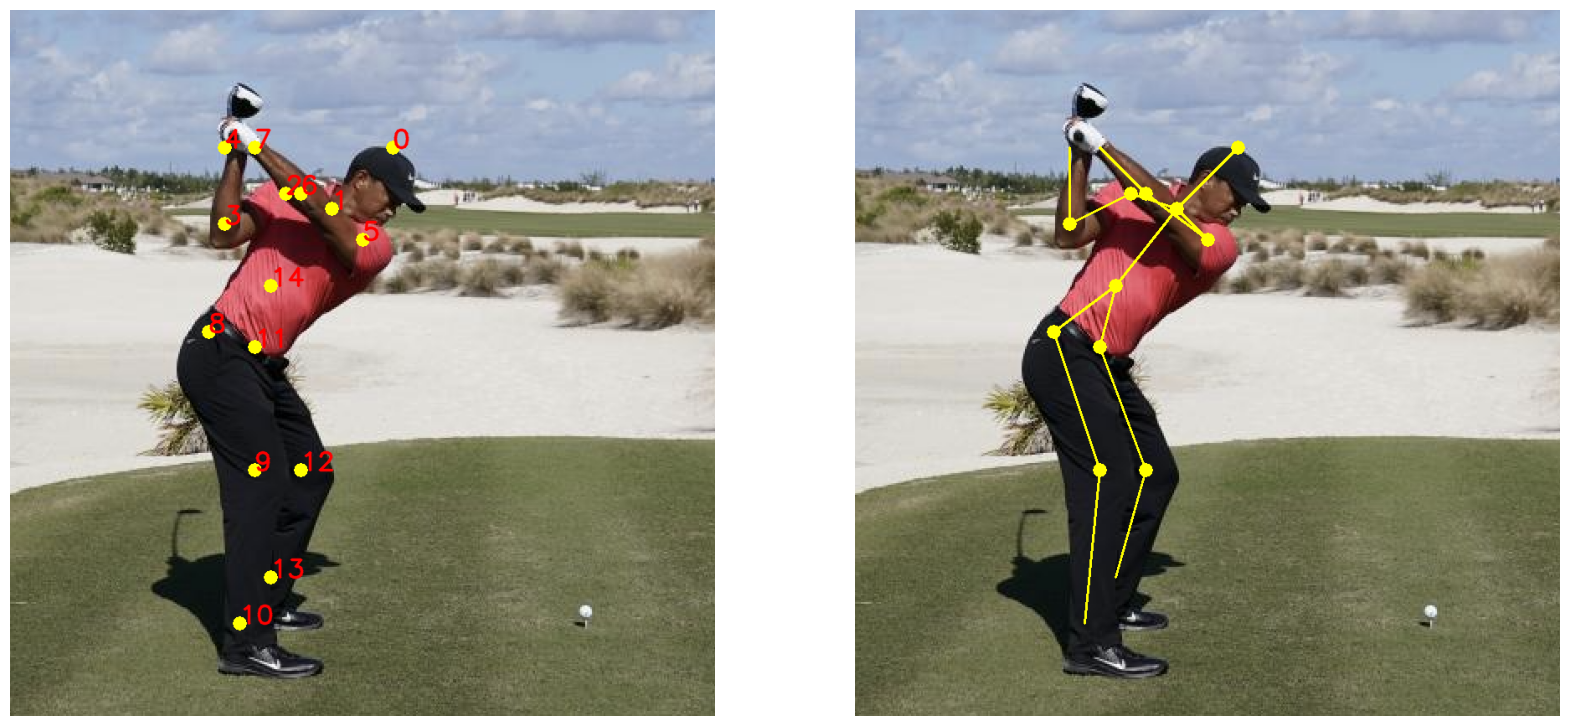

In [13]:
imPoints = im.copy()
imSkeleton = im.copy()

for i, p in enumerate(points):
  cv2.circle(imPoints, p, 8, (255, 255, 0), thickness=-1, lineType=cv2.FILLED)
  cv2.putText(imPoints, "{}".format(i), p, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, lineType=cv2.LINE_AA)

for pair in POSE_PAIRS:
  partA = pair[0]
  partB = pair[1]

  if points[partA] and points[partB]:
    cv2.line(imSkeleton, points[partA], points[partB], (255, 255, 0), 2)
    cv2.circle(imSkeleton, points[partA], 8, (255, 255, 0), thickness=-1, lineType=cv2.FILLED)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(imPoints)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(imSkeleton)
plt.axis("off")